# Ensemble Average Rabi Driving

using new interface

In [1]:
using SpinEnsembles
using Plots
import SpecialFunctions: erfc
import Statistics: mean, std

┌ Info: Precompiling SpinEnsembles [b4cd1eb8-1e24-11e8-3319-93036a3eb9f3]
└ @ Base loading.jl:1423
┌ Info: Precompiling Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1423


Analytical Solution 
$$
F(t)=\exp(i ht-i\frac{\Gamma^2 t}{2h})\text{erfc}(\Gamma \sqrt{\frac{t}{2h}}\frac{1-i}{\sqrt{2}})
$$

In [2]:
F(t::AbstractVector{Float64}, h::Real,Γ::Real)=exp.(im*(h.*t-Γ^2*t ./(2*h))) .* erfc.(Γ*sqrt.(t ./(2*h)) *(1-im)/sqrt(2))

F (generic function with 1 method)

In [3]:
ensemble=SpinEnsemble(0.39486,3,[0,0,1],0.1,10,:spherical)

SpinEnsemble(1653, 0.39486, 3, [0.0, 0.0, 1.0], 0.1, 10.0, :spherical)

In [4]:
T2=coherencetime(ensemble)

1.0000005961378153

## Driving Strength

In [5]:
h_set=[10,20,40,60,80];
h_error_avg=[];
h_error_std=[];

In [6]:
function main_h(h::Real)
    t=0:π/(20*h):50/h*T2
    rabi_curve=rabi(t, ensemble, h; M=200);
    analytical_rabi_curve=real.(F(t,h,T2))
    fig=plot(t,2*rabi_curve, labels="Monte Carlo", label="t", ylabel="S_z(t)")
    plot!(t,analytical_rabi_curve,labels="Analytical Solution") 
    display(fig)

    err=abs.(2*rabi_curve-analytical_rabi_curve)
    append!(h_error_avg,mean(err));
    append!(h_error_std,mean(err));
    return nothing
end


main_h (generic function with 1 method)

$h=10$

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


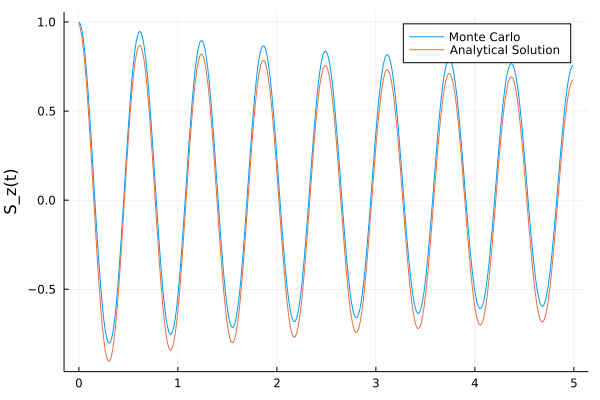

In [7]:
h=10;
main_h(h)

$h=20$

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


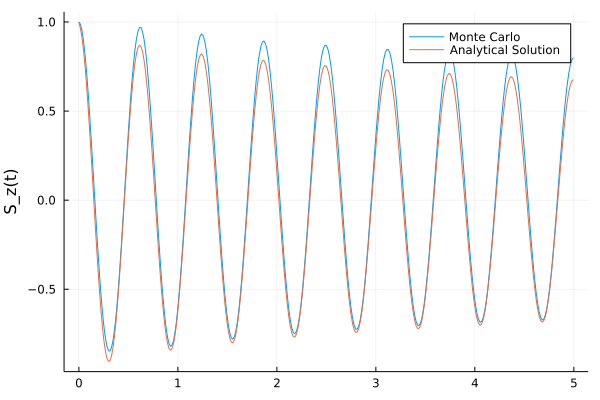

In [8]:
h=10;
main_h(h)

$h=40$

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


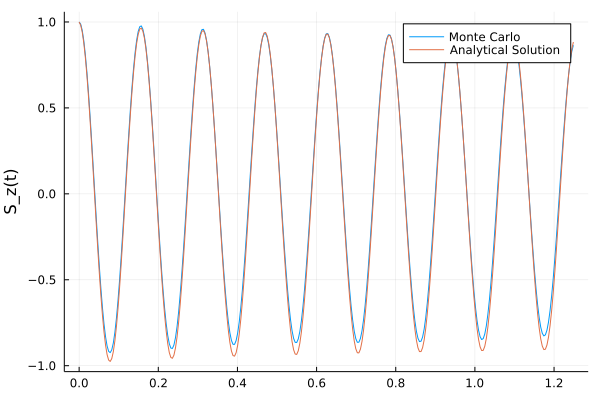

In [9]:
h=40;
main_h(h)

$h=60$

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


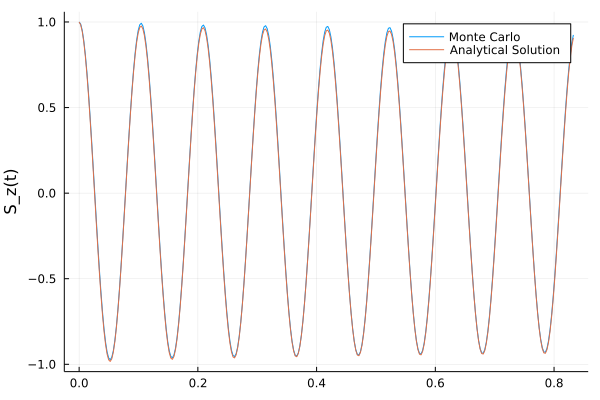

In [10]:
h=60;
main_h(h)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


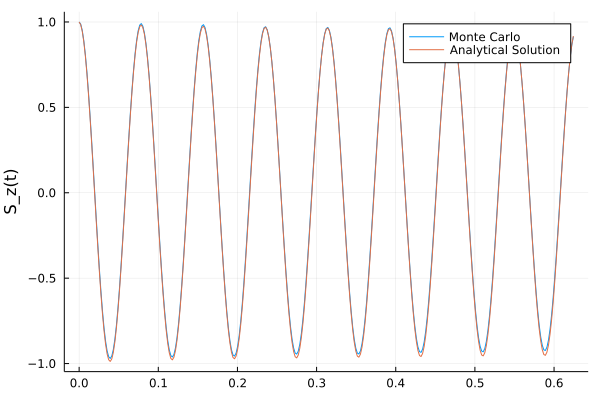

In [11]:
h=80;
main_h(h)

Since Rabi driving requires that $h\gg b$, the theoretical curve will approach the numerical one as $h$ increase. 

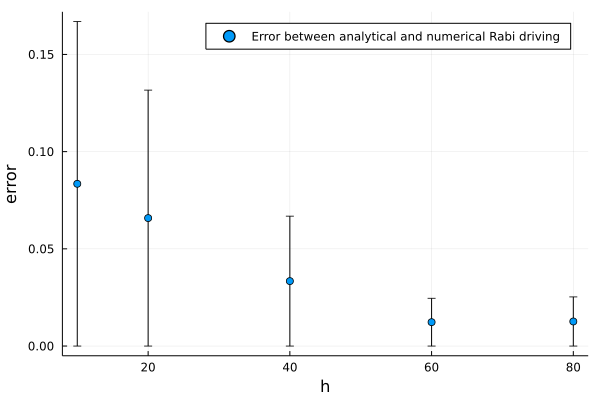

In [12]:
scatter(h_set,h_error_avg, yerr=h_error_std, 
xlabel="h";
ylabel="error",
labels="Error between analytical and numerical Rabi driving")

## Ensemble Size M

In [75]:
function main_m(m::Int)
    t=0:π/(20*h):50/h*T2
    rabi_curve=rabi(t, ensemble, h; M=m);
    analytical_rabi_curve=real.(F(t,h,T2))
    plot!(t,2*rabi_curve, labels="M=$m", label="t", ylabel="S_z(t)")
    # plot!(t,analytical_rabi_curve,labels="Analytical Solution") 
    # display(fig)

    err=abs.(2*rabi_curve-analytical_rabi_curve)
    append!(M_error_avg,mean(err));
    append!(M_error_std,mean(err));
    return nothing
end

main_m (generic function with 1 method)

### Sweep ensemble size M from 100 too 800, 100 per step 

In [76]:
M_set=100:100:800;
M_error_avg=[];
M_error_std=[];

set $h=100$ to reduce the error of analytical approximation

In [77]:
h=100;
fig=plot()
[main_m(m) for m in M_set];

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01
Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


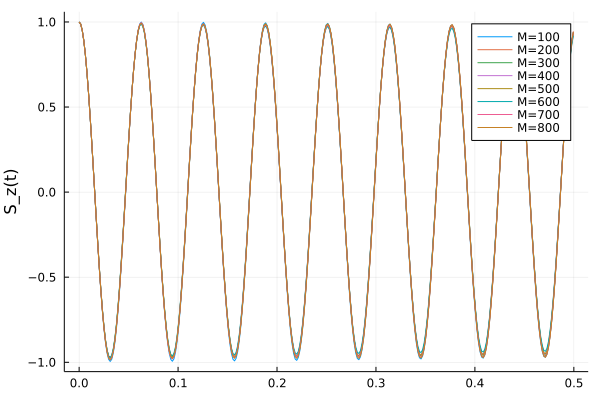

In [78]:
display(fig)

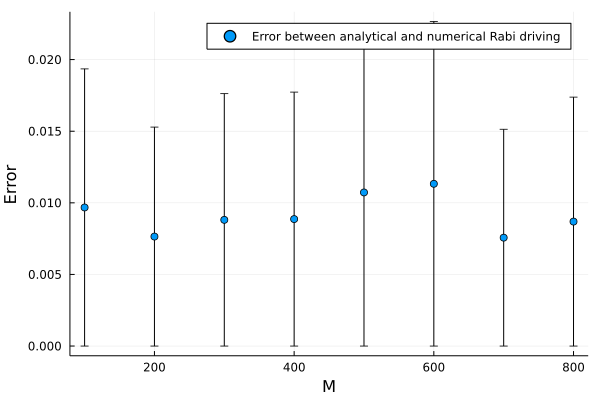

In [79]:
scatter(M_set,M_error_avg, yerr=M_error_std, 
xlabel="M";
ylabel="Error",
labels="Error between analytical and numerical Rabi driving")

The relative error between analytical and numerical prediction don't decrease with ensemble size.

This is caused by the fact that the analytical solution is just an approximation at large $h$.
The error is determined mainly by the driving strength $h$,

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


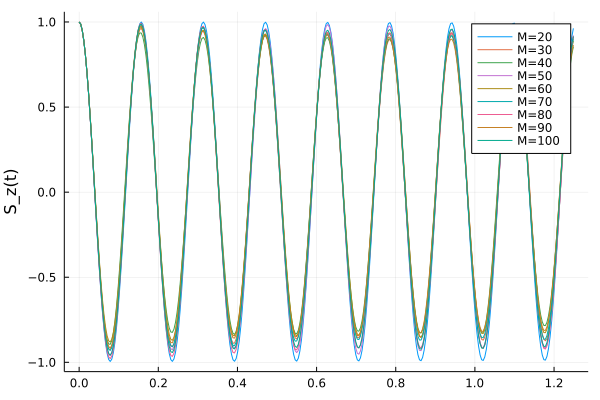

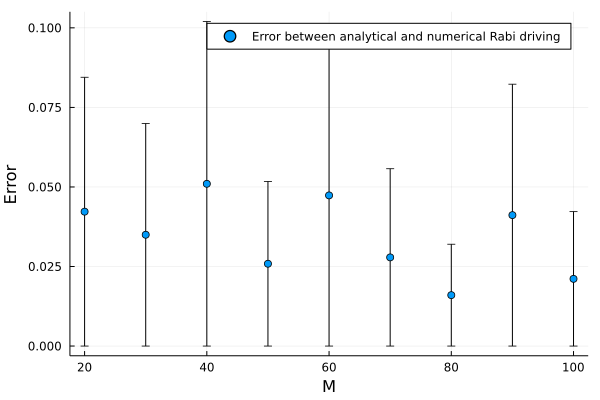

In [83]:
M_set=20:10:100;
M_error_avg=[];
M_error_std=[];
h=40;
fig=plot(fmt=:png)
[main_m(m) for m in M_set];
display(fig)
scatter(M_set,M_error_avg, yerr=M_error_std, 
xlabel="M";
ylabel="Error",
labels="Error between analytical and numerical Rabi driving")

For smaller ensemble size M, the error decrease with ensemble size.

## Sampling size $N$

We can also modify the sampling size N, that is, how many samplings we take from each random distribution of spins.

The default setting of N is 100, and M is 1000.

In [94]:
function main_n(n::Int)
    t=0:π/(20*h):50/h*T2
    rabi_curve=rabi(t, ensemble, h; M=100, N=n);
    analytical_rabi_curve=real.(F(t,h,T2))
    plot!(t,2*rabi_curve, labels="N=$n", label="t", ylabel="S_z(t)")
    # plot!(t,analytical_rabi_curve,labels="Analytical Solution") 
    # display(fig)

    err=abs.(2*rabi_curve-analytical_rabi_curve)
    append!(N_error_avg,mean(err));
    append!(N_error_std,mean(err));
    return nothing
end

main_n (generic function with 1 method)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00
Progress: 100%|█████████████████████████████████████████| Time: 0:00:00


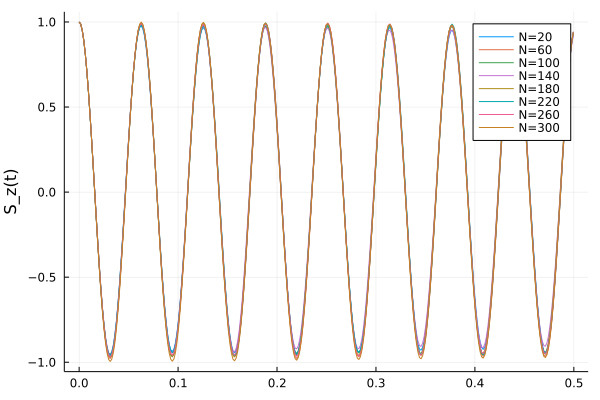

In [95]:
N_set=20:40:300;
N_error_avg=[];
N_error_std=[];
h=100;
fig=plot(fmt=:png)
[main_n(n) for n in N_set];
display(fig)

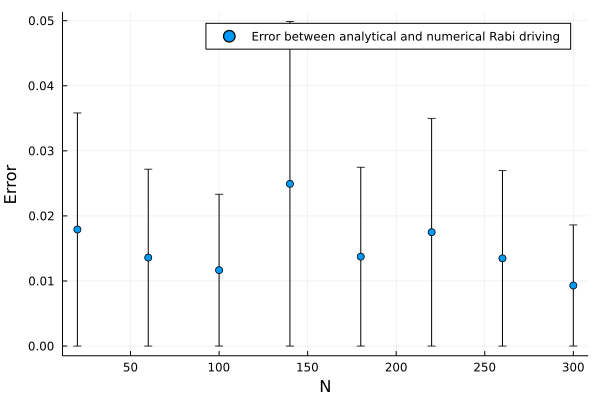

In [96]:
scatter(N_set,N_error_avg, yerr=N_error_std, 
xlabel="N";
ylabel="Error",
labels="Error between analytical and numerical Rabi driving")

It seems that there is no explicit dependency betwen error and sampling number.

*The above results is quite interesting, since it shows that my default parameter setting for $M(1000),N(100)$ is too large.*

I believe reduce the basic setting will greatly improve the performacne of the program.
